In [1]:
#import all the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

The aim of the analysis of this chosen data set is to the see the impact covid 19 had on lives across the globe. This will also feature an analysis of the impact vaccinations had in cabbing the spread and subsequent deaths during the early vaccination stages around the world.

In [2]:
#import dataset
df = pd.read_csv("Covid-19 Activity.csv")
df.head()

,Index,PEOPLE_POSITIVE_CASES_COUNT,COUNTY_NAME,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,COUNTRY_ALPHA_2_CODE,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
0,0,0,Autauga,Alabama,Jan-20,America,New York Times,0,1001,USA,United States,US,0,0
1,1,0,Bristol Bay plus Lake and Peninsula,Alaska,Jan-20,America,New York Times,0,2997,USA,United States,US,0,0
2,2,0,0,Alberta,Jan-20,America,JHU CSSE Global Timeseries,0,0,CAN,Canada,CA,0,0
3,3,0,Unknown,American Samoa,Jan-20,America,New York Times,0,0,USA,United States,US,0,0
4,4,889,0,Anhui,Jan-20,Asia,JHU CSSE Global Timeseries,0,0,CHN,China,CN,237,0


In [3]:
#import related dataset
df2=pd.read_csv("country_vaccinations.csv")
df2.head()

,REPORT_DATE,COUNTRY_SHORT_NAME,Count of total_vaccinations,Count of people_vaccinated,Count of people_fully_vaccinated,Count of daily_vaccinations_raw,Count of daily_vaccinations,Count of total_vaccinations_per_hundred,Count of people_vaccinated_per_hundred,Count of people_fully_vaccinated_per_hundred,Count of daily_vaccinations_per_million,iso_code,vaccines,source_name,source_website
0,Dec-20,Argentina,2.0,NaN,NaN,NaN,2.0,2.0,NaN,NaN,2.0,ARG,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
1,Dec-20,Austria,5.0,5.0,NaN,4.0,4.0,5.0,5.0,NaN,4.0,AUT,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...
2,Dec-20,Bahrain,9.0,9.0,NaN,8.0,8.0,9.0,9.0,NaN,8.0,BHR,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Ministry of Health,https://healthalert.gov.bh/en/
3,Dec-20,Belarus,1.0,1.0,NaN,NaN,3.0,1.0,1.0,NaN,3.0,BLR,"Sinopharm/Beijing, Sputnik V",World Health Organization,https://covid19.who.int/
4,Dec-20,Belgium,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,BEL,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Sciensano,https://epistat.wiv-isp.be/covid/


In [4]:
#combine the 2 data sets to form an enriched dataset
merged_df = pd.merge(df, df2, on='REPORT_DATE', how='inner')
merged_df.head()

,Index,PEOPLE_POSITIVE_CASES_COUNT,COUNTY_NAME,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,COUNTRY_ALPHA_3_CODE,...,Count of daily_vaccinations_raw,Count of daily_vaccinations,Count of total_vaccinations_per_hundred,Count of people_vaccinated_per_hundred,Count of people_fully_vaccinated_per_hundred,Count of daily_vaccinations_per_million,iso_code,vaccines,source_name,source_website
0,1147,3773434,Autauga,Alabama,Dec-20,America,New York Times,491,1001,USA,...,NaN,2.0,2.0,NaN,NaN,2.0,ARG,"Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V",Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
1,1147,3773434,Autauga,Alabama,Dec-20,America,New York Times,491,1001,USA,...,4.0,4.0,5.0,5.0,NaN,4.0,AUT,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://info.gesundheitsministerium.gv.at/open...
2,1147,3773434,Autauga,Alabama,Dec-20,America,New York Times,491,1001,USA,...,8.0,8.0,9.0,9.0,NaN,8.0,BHR,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",Ministry of Health,https://healthalert.gov.bh/en/
3,1147,3773434,Autauga,Alabama,Dec-20,America,New York Times,491,1001,USA,...,NaN,3.0,1.0,1.0,NaN,3.0,BLR,"Sinopharm/Beijing, Sputnik V",World Health Organization,https://covid19.who.int/
4,1147,3773434,Autauga,Alabama,Dec-20,America,New York Times,491,1001,USA,...,3.0,3.0,4.0,4.0,3.0,3.0,BEL,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Sciensano,https://epistat.wiv-isp.be/covid/


In [5]:
# Obtain information about the DataFrame 'df' and its data distribution.
merged_df.info()
merged_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88835 entries, 0 to 88834
Data columns (total 28 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Index                                         88835 non-null  int64  
 1   PEOPLE_POSITIVE_CASES_COUNT                   88835 non-null  int64  
 2   COUNTY_NAME                                   88835 non-null  object 
 3   PROVINCE_STATE_NAME                           88835 non-null  object 
 4   REPORT_DATE                                   88835 non-null  object 
 5   CONTINENT_NAME                                88835 non-null  object 
 6   DATA_SOURCE_NAME                              88835 non-null  object 
 7   PEOPLE_DEATH_NEW_COUNT                        88835 non-null  int64  
 8   COUNTY_FIPS_NUMBER                            88835 non-null  int64  
 9   COUNTRY_ALPHA_3_CODE                          88835 non-null 

,Index,PEOPLE_POSITIVE_CASES_COUNT,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT,Count of total_vaccinations,Count of people_vaccinated,Count of people_fully_vaccinated,Count of daily_vaccinations_raw,Count of daily_vaccinations,Count of total_vaccinations_per_hundred,Count of people_vaccinated_per_hundred,Count of people_fully_vaccinated_per_hundred,Count of daily_vaccinations_per_million
count,88835.000000,8.883500e+04,88835.000000,88835.000000,88835.000000,88835.000000,87173.000000,82713.000000,55591.000000,57038.000000,87380.000000,87173.000000,82713.000000,55591.000000,87380.000000
mean,1532.201340,2.709116e+06,136.768177,16006.069680,7964.041830,49032.519322,14.629908,14.419281,16.763703,18.555086,25.462383,14.629908,14.419281,16.763703,25.462383
std,155.963036,4.751223e+06,341.652656,20674.675599,19174.242944,86852.734454,11.798092,11.737793,11.568674,11.170380,8.548001,11.798092,11.737793,11.568674,8.548001
min,1147.000000,0.000000e+00,-3.000000,0.000000,-104.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1420.000000,1.871500e+04,0.000000,0.000000,7.000000,93.000000,3.000000,3.000000,4.000000,7.000000,25.000000,3.000000,3.000000,4.000000,25.000000
50%,1551.000000,4.878150e+05,6.000000,0.000000,656.000000,6227.000000,11.000000,11.000000,18.000000,21.000000,30.000000,11.000000,11.000000,18.000000,30.000000
75%,1663.000000,3.842539e+06,128.000000,32013.000000,6999.000000,64515.000000,28.000000,28.000000,29.000000,30.000000,31.000000,28.000000,28.000000,29.000000,31.000000
max,1769.000000,2.931753e+07,3131.000000,78010.000000,267964.000000,493383.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000


In [6]:
#Explore correlation between positive cases, death cases and total vaccination of people
correlation_matrix = merged_df[['PEOPLE_POSITIVE_CASES_COUNT', 'Count of total_vaccinations', 'PEOPLE_DEATH_COUNT']].corr()
correlation_matrix

,PEOPLE_POSITIVE_CASES_COUNT,Count of total_vaccinations,PEOPLE_DEATH_COUNT
PEOPLE_POSITIVE_CASES_COUNT,1.000000,0.013508,0.945680
Count of total_vaccinations,0.013508,1.000000,0.012876
PEOPLE_DEATH_COUNT,0.945680,0.012876,1.000000


As expected, the number of positive cases has a very high correlation with the total number of people death at 0.95 while the number of both positive cases and death cases has a significantly low correlation with the amount of people being vaccinated.

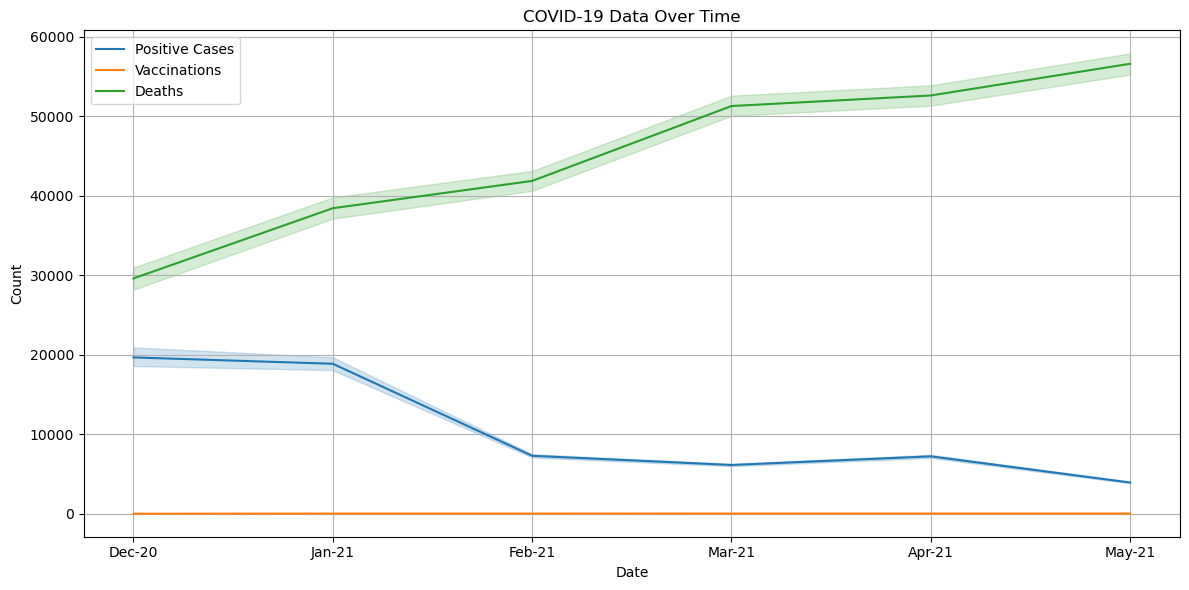

In [7]:
#Visualize the relationship between positive cases reported, death cases reported and vaccinations administered over time
plt.figure(figsize=(12, 6))

# Line plot for positive cases
sns.lineplot(data=merged_df, x='REPORT_DATE', y='PEOPLE_POSITIVE_NEW_CASES_COUNT', label='Positive Cases')

# Line plot for vaccinations
sns.lineplot(data=merged_df, x='REPORT_DATE', y='Count of daily_vaccinations', label='Vaccinations')

# Line plot for deaths
sns.lineplot(data=merged_df, x='REPORT_DATE', y='PEOPLE_DEATH_COUNT', label='Deaths')

# Customize the plot
plt.title('COVID-19 Data Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


From the graph above, it's interesting to note that though the introduction of vaccination was low at the time, it led to a significant drop in the number of new positive cases that were reported across the globe. However, during the same period, the number of death cases seemed to go even higher over time.

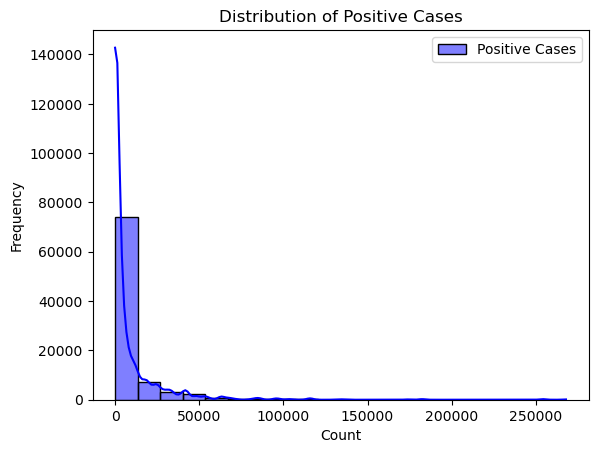

In [8]:
#Create histograms to explore distribution of positive cases, deaths and vaccination
sns.histplot(merged_df['PEOPLE_POSITIVE_NEW_CASES_COUNT'], bins=20, kde=True, color='blue', label='Positive Cases')
plt.title('Distribution of Positive Cases')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [9]:
#Calculate the mean, median and Standard deviation
mean_positive_cases = df['PEOPLE_POSITIVE_NEW_CASES_COUNT'].mean()
median_positive_cases = df['PEOPLE_POSITIVE_NEW_CASES_COUNT'].median()
std_positive_cases = df['PEOPLE_POSITIVE_NEW_CASES_COUNT'].std()

# Print the results
print("Mean New Positive cases:", mean_positive_cases)
print("Median New Positive cases:", median_positive_cases)
print("Standard Deviation of New Positive cases:", std_positive_cases)


Mean New Positive cases: 11632.454264099037
Median New Positive cases: 404.0
Standard Deviation of New Positive cases: 44384.96174760546


With a mean of 11,632 and a median of 404, the median seats as a better description of the average number of new positive cases reported each month across the world. The mean is skewed to the right as in some months, there were extremely high numbers of cases recorded, but the general trend was aroud 404 new cases on average.
The standard deviation of 44,384 indicates that from every month to the next, the number of new positive cases fluctuated by upto 44,384 cases from the mean

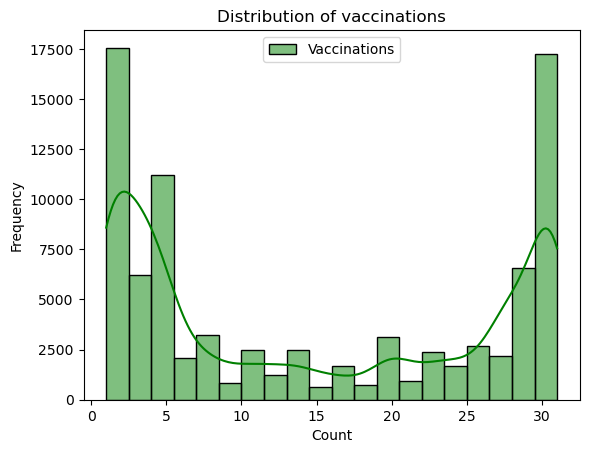

In [10]:
sns.histplot(merged_df['Count of total_vaccinations'], bins=20, kde=True, color='green', label='Vaccinations')
plt.title('Distribution of vaccinations')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

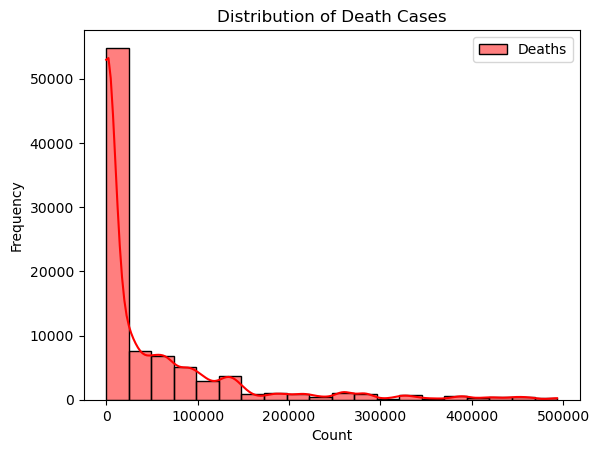

In [11]:
sns.histplot(merged_df['PEOPLE_DEATH_COUNT'], bins=20, kde=True, color='red', label='Deaths')
plt.title('Distribution of Death Cases')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [12]:
#Calculate the mean, median and Standard deviation
mean_people_death = df['PEOPLE_DEATH_COUNT'].mean()
median_people_death = df['PEOPLE_DEATH_COUNT'].median()
std_people_death = df['PEOPLE_DEATH_COUNT'].std()

# Print the results
print("Mean People death cases:", mean_people_death)
print("Median People death cases:", median_people_death)
print("Standard Deviation of People death cases:", std_people_death)


Mean People death cases: 42770.95116918845
Median People death cases: 682.0
Standard Deviation of People death cases: 92741.5074402653


With a mean of 42,770 cases of death and a median of 682, we can say that the average cases of death across th globe were at 682 per month, with the mean being largely affected by a few months with some extremely high number of deaths. 
A standard deviation of 92,741 shows that in some months, there were variations of upto 92,741 death cases from the mean

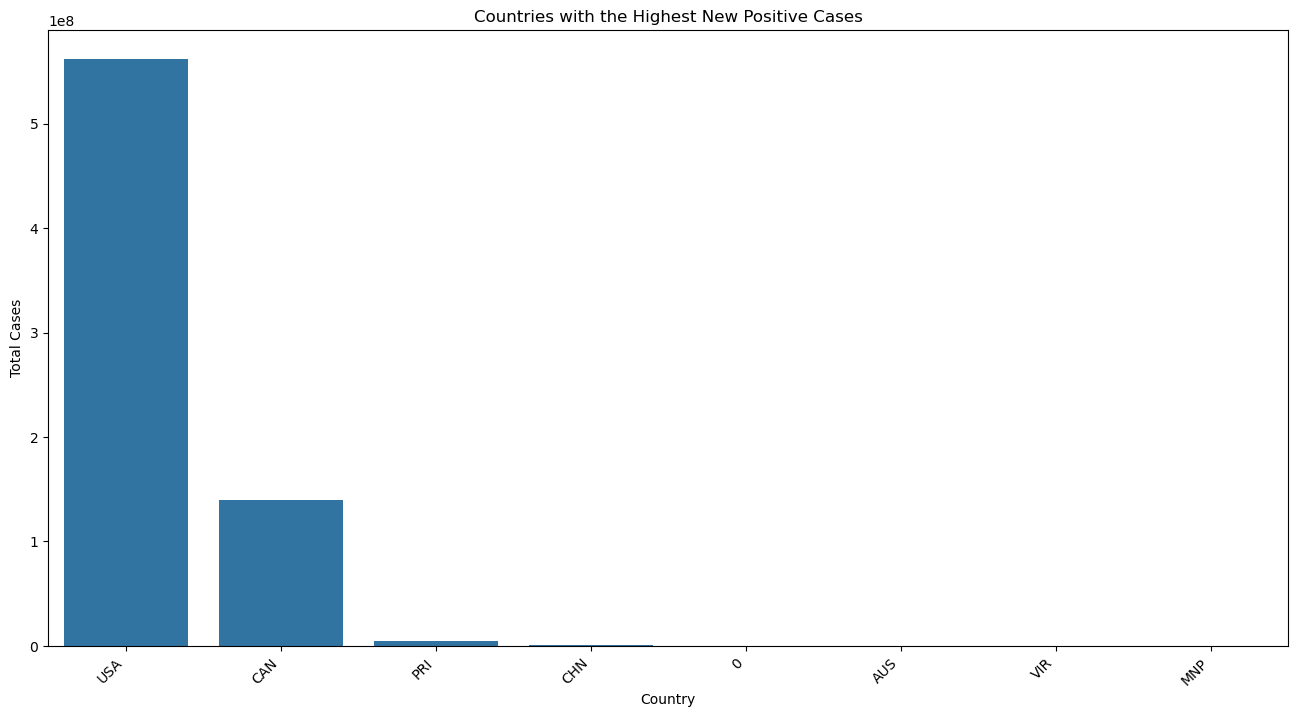

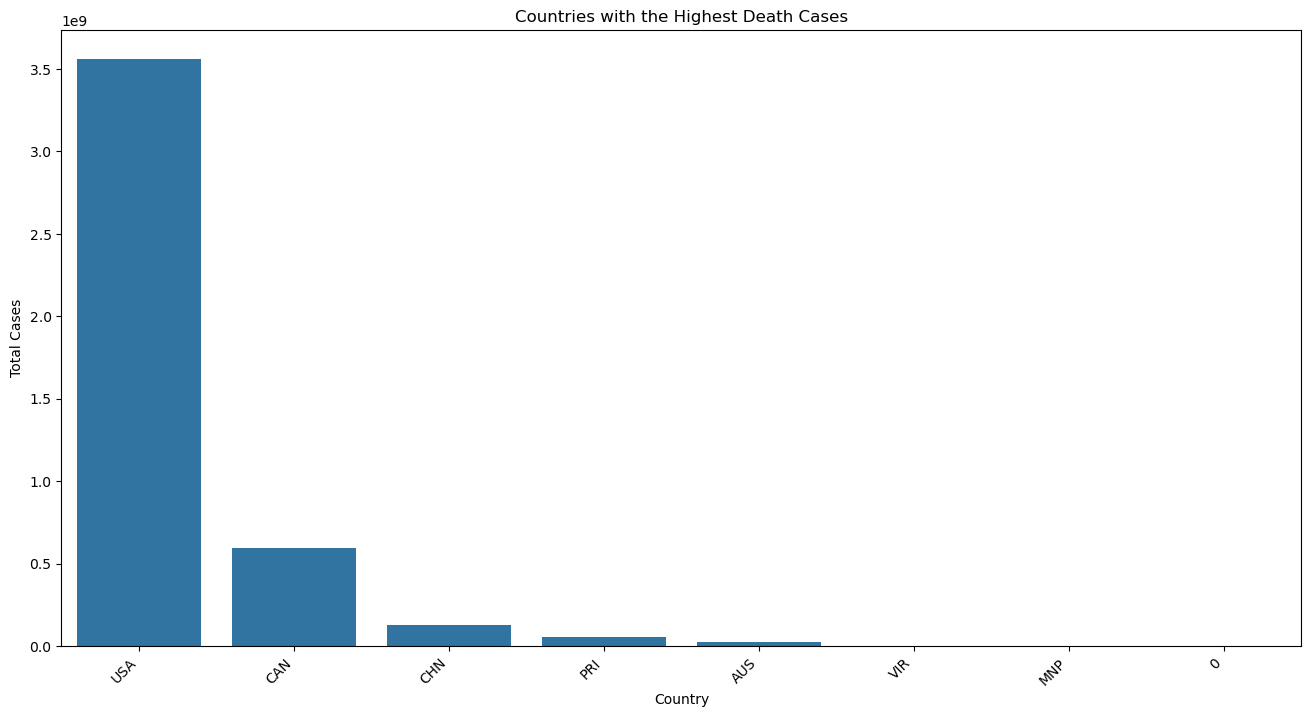

In [26]:
#Create vizualisation to show the top 10 coutries by new positive cases and by death cases 
# Group by country and sum the new positive cases
df_cases_by_country = merged_df.groupby('COUNTRY_ALPHA_3_CODE')['PEOPLE_POSITIVE_NEW_CASES_COUNT'].sum().reset_index()

# Sort the DataFrame by new positive cases in descending order
df_sorted_cases = df_cases_by_country.sort_values(by='PEOPLE_POSITIVE_NEW_CASES_COUNT', ascending=False)


# Extract the top 10 countries with the highest new positive cases
top_countries_cases = df_sorted_cases.head(10)['COUNTRY_ALPHA_3_CODE']

# Create a countplot for new positive cases
plt.figure(figsize=(16, 8))
sns.barplot(x='COUNTRY_ALPHA_3_CODE', y='PEOPLE_POSITIVE_NEW_CASES_COUNT', data=df_sorted_cases.head(10))
plt.title('Countries with the Highest New Positive Cases')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


# Group by country and sum the death cases
df_cases_by_country = merged_df.groupby('COUNTRY_ALPHA_3_CODE')['PEOPLE_DEATH_COUNT'].sum().reset_index()

# Sort the DataFrame by new positive cases in descending order
df_sorted_cases = df_cases_by_country.sort_values(by='PEOPLE_DEATH_COUNT', ascending=False)


# Extract the top 10 countries with the highest new positive cases
top_countries_cases = df_sorted_cases.head(10)['COUNTRY_ALPHA_3_CODE']

# Create a countplot for new positive cases
plt.figure(figsize=(16, 8))
sns.barplot(x='COUNTRY_ALPHA_3_CODE', y='PEOPLE_DEATH_COUNT', data=df_sorted_cases.head(10))
plt.title('Countries with the Highest Death Cases')
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


From the above graphs, it can be seen that the USA dominated the world in both the number of new cases recorded each month and on the number of death cases recorded, with their Northern  neighbours Canada coming in second.